# Natural Language Processing
---------------------------------------------------

This example shows how to use ATOM to quickly go from raw text data to model predictions.

Import the 20 newsgroups text dataset from [sklearn.datasets](https://scikit-learn.org/0.19/datasets/twenty_newsgroups.html). The dataset comprises around 18000 articles on 20 topics. The goal is to predict the topic of every article.

## Load the data

In [1]:
import numpy as np
from atom import ATOMClassifier
from sklearn.datasets import fetch_20newsgroups

In [2]:
# Use only a subset of the available topics for faster processing
X_text, y_text = fetch_20newsgroups(
    return_X_y=True,
    categories=[
        'alt.atheism',
        'sci.med',
        'comp.windows.x',
        'misc.forsale',
        'rec.autos',
    ],
#     shuffle=True,
    random_state=1,
)
X_text = np.array(X_text).reshape(-1, 1)

## Run the pipeline

In [3]:
atom = ATOMClassifier(X_text, y_text, test_size=0.2, verbose=2, warnings=True, random_state=2)

<< ================== ATOM ================== >>
Algorithm task: multiclass classification.

Dataset stats ==================== >>
Shape: (2846, 2)
Memory: 5.13 MB
Scaled: False
Categorical features: 1 (100.0%)
-------------------------------------
Train set size: 2277
Test set size: 569
-------------------------------------
|   |     dataset |       train |        test |
| - | ----------- | ----------- | ----------- |
| 0 |   480 (1.0) |   384 (1.0) |    96 (1.0) |
| 1 |   593 (1.2) |   475 (1.2) |   118 (1.2) |
| 2 |   585 (1.2) |   468 (1.2) |   117 (1.2) |
| 3 |   594 (1.2) |   475 (1.2) |   119 (1.2) |
| 4 |   594 (1.2) |   475 (1.2) |   119 (1.2) |



In [4]:
import pandas as pd
pd.options.display.max_colwidth = 200
atom.dataset  # Note that the feature is automatically named 'corpus'

,corpus,target
0,"From: egreshko@twntpe.cdc.COM (Ed Greshko)\nSubject: cxterm on MIPS\nOrganization: The Internet\nLines: 13\nTo: xpert@expo.lcs.mit.edu\n\n\nHello,\n\n\tHas anyone built cxterm (X11R5) on a MIPS pl...",1
1,"From: davis@b11.b11.ingr.com (Chris Davis)\nSubject: For Sale or Trade: IBM Games\nOrganization: Intergraph Corp. Huntsville, AL\nLines: 29\n\n ***** IBM GAMES FOR SALE OR TRADE ****...",2
2,"From: snail@lsl.co.uk\nSubject: MOTIF & X on Windows NT\nOrganization: Laser-Scan Ltd., Cambridge\nLines: 16\n\nIn article <1993Apr7.044749.11770@topgun>, smikes@topgun (Steven Mikes) writes:\n> A...",1
3,"From: dcr@mail.ast.cam.ac.uk (Derek C. Richardson)\nSubject: Allocated colors...\nNntp-Posting-Host: ioas09.ast.cam.ac.uk\nReply-To: dcr@mail.ast.cam.ac.uk\nOrganization: Institute of Astronomy, C...",1
4,From: bob1@cos.com (Bob Blackshaw)\nSubject: Re: Too fast\nOrganization: Corporation for Open Systems\nDistribution: world \nLines: 35\n\nIn <1993Apr14.045526.21945@cactus.org> boyle@cactus.org (C...,3
...,...,...
2841,"From: bhjelle@carina.unm.edu ()\nSubject: Re: My New Diet --> IT WORKS GREAT !!!!\nOrganization: University of New Mexico, Albuquerque\nLines: 19\nNNTP-Posting-Host: carina.unm.edu\n\nIn article <...",4
2842,"From: halat@pooh.bears (Jim Halat)\nSubject: Re: The Inimitable Rushdie (Re: An Anecdote about Islam\nReply-To: halat@pooh.bears (Jim Halat)\nLines: 33\n\nIn article <115288@bu.edu>, jaeger@buphy....",0
2843,From: music@erich.triumf.ca (FRED W. BACH)\nSubject: Re: Auto air conditioning without Freon\nOrganization: TRIUMF: Tri-University Meson Facility\nLines: 75\nDistribution: usa\nNNTP-Posting-Host: ...,3
2844,"From: chudel@watarts.uwaterloo.ca (Chris Hudel)\nSubject: 4-plane Xterminal (Do I want one?)\nKeywords: plane, Xterminal\nOrganization: University of Waterloo\nLines: 12\n\nI've been offerred an o...",1


In [5]:
# Let's have a look at the first document
atom.corpus[0]

"From: egreshko@twntpe.cdc.COM (Ed Greshko)\nSubject: cxterm on MIPS\nOrganization: The Internet\nLines: 13\nTo: xpert@expo.lcs.mit.edu\n\n\nHello,\n\n\tHas anyone built cxterm (X11R5) on a MIPS platform.  If you have,\nplease send me email as I don't read this group.  I've a bunch of questions...\n:-)\n\n\t\t\t\tThanks\n\nEdward M. Greshko\t\t\tControl Data Taiwan\nVoice: +886-2-715-2222 x287\t\t6/F, 131 Nanking East Road, Section 3\nFAX  : +886-2-712-9197\t\t\tTaipei, Taiwan R.O.C\n\n"

In [6]:
# Clean the documents from noise (emails, numbers, etc...)
atom.textclean()

Cleaning the corpus...
 --> Decoding unicode characters to ascii.
 --> Converting text to lower case.
 --> Dropping 10012 emails from 2830 documents.
 --> Dropping 0 URL links from 0 documents.
 --> Dropping 2214 HTML tags from 1304 documents.
 --> Dropping 2 emojis from 1 documents.
 --> Dropping 31222 numbers from 2843 documents.
 --> Dropping punctuation from the text.


In [7]:
# Have a look at the removed items
atom.drops

,email,url,html,emoji,number
0,"[egreshko@twntpe.cdc.com, xpert@expo.lcs.mit.edu]",NaN,NaN,NaN,"[13, 886, 2, 715, 2222, 6, 131, 3, 886, 2, 712, 9197]"
1,"[davis@b11.b11.ingr.com, ccdavis@nuwave.b11.ingr.com]",NaN,NaN,NaN,"[29, 35, 35, 35, 30, 30, 10, 205, 730, 6236]"
2,"[snail@lsl.co.uk, snail@lsl.co.uk]",NaN,[<1993apr7.044749.11770@topgun>],NaN,"[16, 1, 1]"
3,"[dcr@mail.ast.cam.ac.uk, dcr@mail.ast.cam.ac.uk, dcr@mail.ast.cam.ac.uk]",NaN,NaN,NaN,"[20, 0223, 337548, 37501, 0223, 337523]"
4,"[bob1@cos.com, 1993apr14.045526.21945@cactus.org, boyle@cactus.org, 5ju@umcc.umcc.umich.edu, mhartman@umcc.umcc.umich.edu, mhartman@umcc.umcc.umich.edu, bk405@cleveland.freenet.edu]",NaN,"[<>, <1qg19v$>]",NaN,"[35, 130, 130, 130, 130, 130, 99, 60, 130, 130, 30]"
...,...,...,...,...,...
2841,"[bhjelle@carina.unm.edu, 1993apr21.091844.4035@omen.uucp, caf@omen.uucp, 19687@pitt.uucp, geb@cs.pitt.edu]",NaN,"[<>, <>]",NaN,"[19, 88, 1987]"
2842,"[halat@pooh.bears, halat@pooh.bears, 115288@bu.edu, jaeger@buphy.bu.edu]",NaN,[<>],NaN,[33]
2843,"[music@erich.triumf.ca, 1993apr19.220321.4565@research.nj.nec.com, behanna@syl.nj.nec.com, 1993apr16.160825.25622@newsgate.sps.mot.com, rapw20@email.sps.mot.com, 1993apr15.222600.11690@research.nj...",NaN,"[<>, <>, <>]",NaN,"[75, 12, 1, 41, 300, 1000, 12, 12, 12, 114, 1983, 1975, 1991, 11, 604, 222, 1047, 327, 278, 4004, 604, 222, 1074]"
2844,[chudel@watarts.uwaterloo.ca],NaN,NaN,NaN,"[4, 12, 4, 4, 1, 8, 4, 4, 1, 8]"


In [8]:
# Check how the first document changed
atom.corpus[0]

'from  ed greshko\nsubject cxterm on mips\norganization the internet\nlines \nto \n\n\nhello\n\n\thas anyone built cxterm x11r5 on a mips platform  if you have\nplease send me email as i dont read this group  ive a bunch of questions\n\n\n\t\t\t\tthanks\n\nedward m greshko\t\t\tcontrol data taiwan\nvoice  x87\t\tf  nanking east road section \nfax   2\t\t\ttaipei taiwan roc\n\n'

In [9]:
# Convert the strings to a sequence of words
atom.tokenize()

Tokenizing the corpus...


In [10]:
# Print the first few words of the first document
atom.corpus[0][:7]

['from', 'ed', 'greshko', 'subject', 'cxterm', 'on', 'mips']

In [11]:
# Normalize the text to a predefined standard
atom.normalize(stopwords="english", lemmatize=True)

Normalizing the corpus...
 --> Dropping stopwords.
 --> Applying lemmatization.


In [12]:
atom.corpus[0][:7]  # Check changes...

['ed', 'greshko', 'subject', 'cxterm', 'mips', 'organization', 'internet']

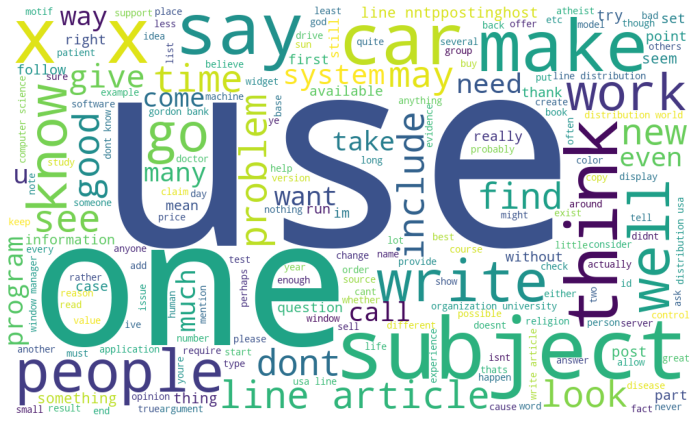

In [13]:
# Visualize the most common words with a wordcloud
atom.plot_wordcloud()

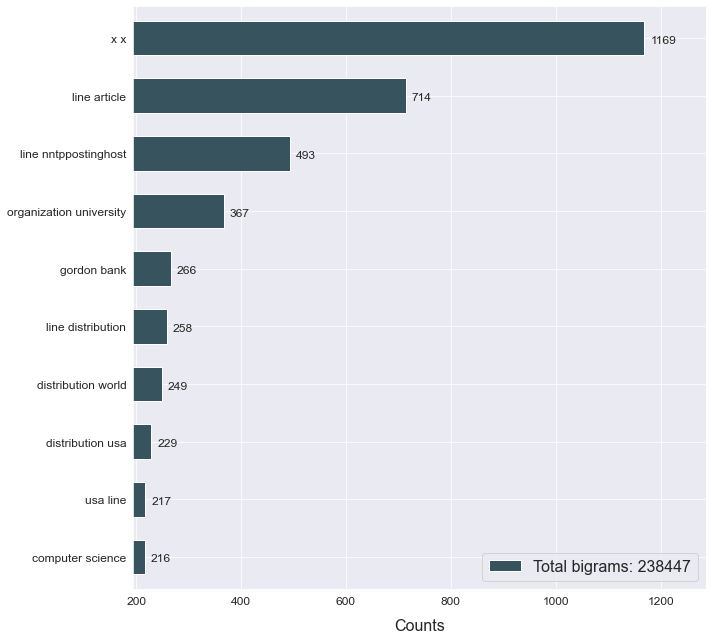

In [14]:
# Have a look at the most frequent bigrams
atom.plot_ngrams(2)

In [15]:
# Create the bigrams using the tokenizer
atom.tokenize(bigram_freq=215)

Tokenizing the corpus...
 --> Creating 10 bigrams on 4178 locations.


In [16]:
atom.bigrams

,bigram,frequency
0,x_x,1169
1,line_article,714
2,line_nntppostinghost,493
3,organization_university,367
4,gordon_bank,266
5,line_distribution,258
6,distribution_world,249
7,distribution_usa,229
8,usa_line,217
9,computer_science,216


In [17]:
# As a last step before modelling, convert the words to vectors
atom.vectorize(strategy="tf-idf")

Fitting Vectorizer...
Vectorizing the corpus...


In [18]:
# The dimensionality of the dataset has increased a lot!
atom.shape

(2846, 29349)

In [19]:
# Note that the data is sparse and the columns are named
# after the words they are embedding
atom.dtypes

00          Sparse[float64, 0]
000         Sparse[float64, 0]
000000e5    Sparse[float64, 0]
00000ee5    Sparse[float64, 0]
000010af    Sparse[float64, 0]
                   ...        
zx          Sparse[float64, 0]
zyklonb     Sparse[float64, 0]
zz          Sparse[float64, 0]
zzzs        Sparse[float64, 0]
target_y                 int64
Length: 29349, dtype: object

In [20]:
# Check which models have support for sparse matrices
atom.available_models()

numpy.ufunc size changed, may indicate binary incompatibility. Expected 216 from C header, got 232 from PyObject


,acronym,fullname,estimator,module,needs_scaling,accepts_sparse,supports_gpu
0,Dummy,Dummy Estimator,DummyClassifier,sklearn.dummy,False,False,False
1,GP,Gaussian Process,GaussianProcessClassifier,sklearn.gaussian_process._gpc,False,False,False
2,GNB,Gaussian Naive Bayes,GaussianNB,sklearn.naive_bayes,False,False,True
3,MNB,Multinomial Naive Bayes,MultinomialNB,sklearn.naive_bayes,False,True,True
4,BNB,Bernoulli Naive Bayes,BernoulliNB,sklearn.naive_bayes,False,True,True
5,CatNB,Categorical Naive Bayes,CategoricalNB,sklearn.naive_bayes,False,True,True
6,CNB,Complement Naive Bayes,ComplementNB,sklearn.naive_bayes,False,True,False
7,Ridge,Ridge Estimator,RidgeClassifier,sklearn.linear_model._ridge,True,True,True
8,Perc,Perceptron,Perceptron,sklearn.linear_model._perceptron,True,False,False
9,LR,Logistic Regression,LogisticRegression,sklearn.linear_model._logistic,True,True,True


In [21]:
# Train the model
atom.run(models="MLP", metric="f1_weighted")


Training ========================= >>
Models: MLP
Metric: f1_weighted


Results for Multi-layer Perceptron:
Fit ---------------------------------------------
Train evaluation --> f1_weighted: 1.0
Test evaluation --> f1_weighted: 0.9684
Time elapsed: 1m:38s
-------------------------------------------------
Total time: 1m:38s


Final results ==================== >>
Duration: 1m:38s
-------------------------------------
Multi-layer Perceptron --> f1_weighted: 0.9684


## Analyze results

In [22]:
atom.evaluate()

,balanced_accuracy,f1_weighted,jaccard_weighted,matthews_corrcoef,precision_weighted,recall_weighted
MLP,0.969116,0.968428,0.939417,0.960441,0.968675,0.968366


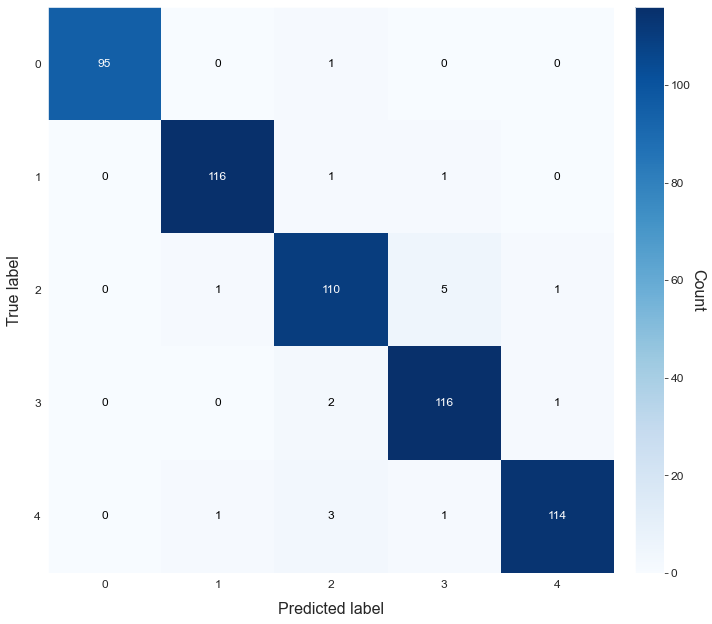

In [23]:
atom.plot_confusion_matrix(figsize=(10, 10))

In [24]:
atom.plot_roc()

PermissionError: The plot_roc method is only available for binary classification tasks!